# Part I - Prosper Loan Data Exploration
## by Radu Covlea

## Introduction

>> The dataset used in this project is the Prosper Loan Data, which contains information on loan listings from Prosper, a peer-to-peer lending platform. The dataset includes a variety of features related to the loans, borrowers, and loan performance. This project will explore these features to uncover patterns, relationships, and insights using Python data science and visualization libraries.

## Preliminary Wrangling

In [27]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [28]:
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [11]:
df.shape

(113937, 81)

### What is the structure of your dataset?

> In this dataset, we got 113937 rows and 81 columns.

### What is/are the main feature(s) of interest in your dataset?

> The main features on interest are:

> LoanStatus: The current status of the loan (e.g., Completed, Current, Chargedoff). This feature is crucial for understanding the outcome of the loans.

> BorrowerAPR: The annual percentage rate (APR) charged to the borrower. This feature is important for analyzing the cost of the loan to the borrower.
    
> BorrowerRate: The interest rate charged to the borrower. Similar to APR, this rate is key for evaluating loan costs.

> Term: The length of the loan in months. This feature helps in understanding the loan duration.
    
> LoanOriginalAmount: The original amount of the loan. This feature is essential for analyzing the size of the loans issued.
    
> DebtToIncomeRatio: The debt-to-income ratio of the borrower. This feature is crucial for understanding the borrower's financial health.
    
> ProsperScore: A custom risk score provided by Prosper. This score helps in assessing the risk level of the loans.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> To support the investigation into the main features of interest, the following features in the dataset will be particularly useful:

> Term: To analyze how the loan term affects the loan status.

> BorrowerAPR and BorrowerRate: To investigate if there is a correlation between interest rates and loan status.

> CreditGrade and ProsperScore: To understand the impact of borrower creditworthiness on loan outcomes.

> LoanOriginalAmount: To see if loan amounts influence the likelihood of different loan statuses.

> DebtToIncomeRatio: To determine if borrowers' financial health affects loan performance.

> ProsperRating (Alpha) and ProsperScore: To examine how Prosper's risk assessments correlate with APR/rate.

> EmploymentStatus and IncomeRange: To investigate if employment and income levels affect the interest rates charged.


## Univariate Exploration

> In this section, investigate distributions of individual variables. If you see unusual points or outliers, take a deeper look to clean things up and prepare yourself to look at relationships between variables.

### Question 1: What is the distribution of LoanStatus in the dataset?

In [29]:
#function for presetting figsize so we avoid code repetition
def set_figsize(width=12, height=6):
    """
    Function to set the figure size.
    Parameters:
    - width: int, the width of the figure
    - height: int, the height of the figure
    """
    plt.figure(figsize=(width, height))

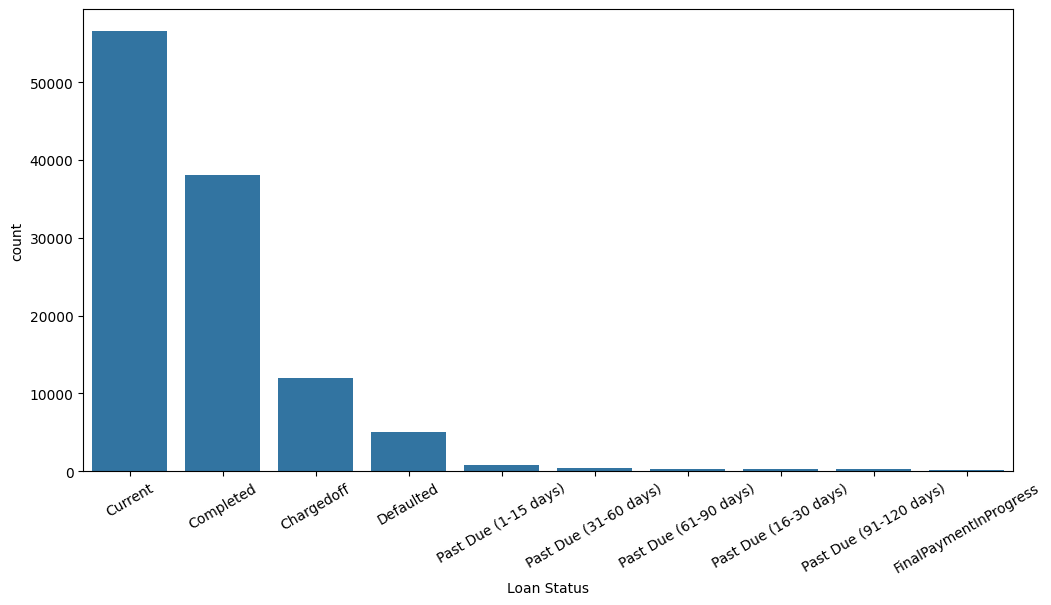

In [30]:
#making 'LoanStatus' variable categorical data type

def set_ordered_loan_status(df, column_name='LoanStatus'):
    """
    Sets the specified column in the DataFrame to a categorical type with a specific order for loan statuses.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the loan status column.
    column_name (str): The name of the column to be converted. Default is 'LoanStatus'.

    Returns:
    pandas.DataFrame: The DataFrame with the ordered categorical column.
    """
    loan_status = ['Current', 'Completed','Chargedoff','Defaulted','Past Due (1-15 days)',
                   'Past Due (31-60 days)','Past Due (61-90 days)','Past Due (16-30 days)', 
                   'Past Due (91-120 days)', 'FinalPaymentInProgress']
    ordered_loan_status = pd.CategoricalDtype(ordered=True, categories=loan_status)
    df[column_name] = df[column_name].astype(ordered_loan_status)
    return df

set_ordered_loan_status(df, 'LoanStatus')
set_figsize()
sns.countplot(data=df, x='LoanStatus', color='tab:blue')
plt.xlabel('Loan Status')
plt.xticks(rotation=30)
plt.show()

### Observations: 
> The most common loan status is "Current," followed by "Completed."
> A significant number of loans are "Chargedoff" or "Defaulted."
> There are insignificant counts for various "Past Due" statuses and other categories like "FinalPaymentInProgress" and "Cancelled."

### Question 2: What is the distribution of BorrowerAPR?

In [31]:
df['BorrowerAPR'] = df['BorrowerAPR'].dropna()

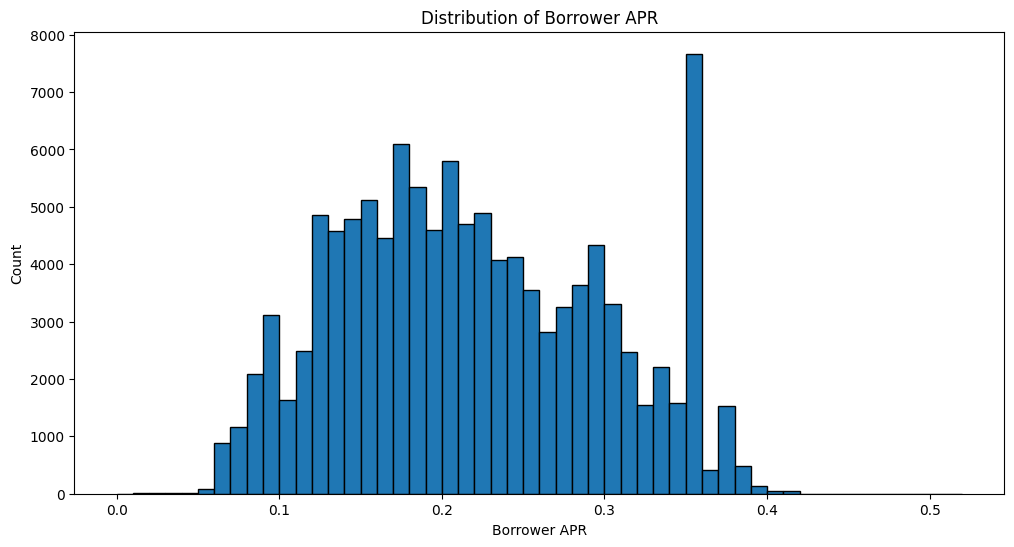

In [32]:
bins_apr = np.arange(0, df['BorrowerAPR'].max() + 0.01, 0.01)
set_figsize()
plt.hist(df['BorrowerAPR'], bins=bins_apr, edgecolor='k')
plt.title('Distribution of Borrower APR')
plt.xlabel('Borrower APR')
plt.ylabel('Count')
plt.show()

### Observations: 
> The distribution of Borrower APR is right-skewed, with a peak around 0.1 to 0.2.
> There are a few notable spikes in the distribution, particularly around 0.35, which might indicate special interest rates or promotions.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distributions of LoanStatus and BorrowerAPR provide a good starting point for understanding the dataset:

> The LoanStatus distribution shows that most loans are either current or completed, with fewer loans falling into default or charged-off categories.

> The BorrowerAPR distribution is right-skewed with concentrations in specific ranges, which might require further investigation to understand any anomalies or spikes.

> No immediate transformations were needed, but further analysis might benefit from more detailed investigation into the spikes and skewness in BorrowerAPR.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> On the features I investigated there are not unusual distributions, though on "LoanStatus" there are only three significant values, the others got so less count but it is normal. I performed operations like dropping null values and bining to tidy and adjust data and visualizations

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your data. Make sure the variables that you cover here have been introduced in some fashion in the previous section (univariate exploration).


### Question 1: What is the relationship between BorrowerAPR and LoanOriginalAmount?

In [33]:
# choose a data sample so we can observe the relationship better
sample_data = df.sample(n=1000, random_state=1)

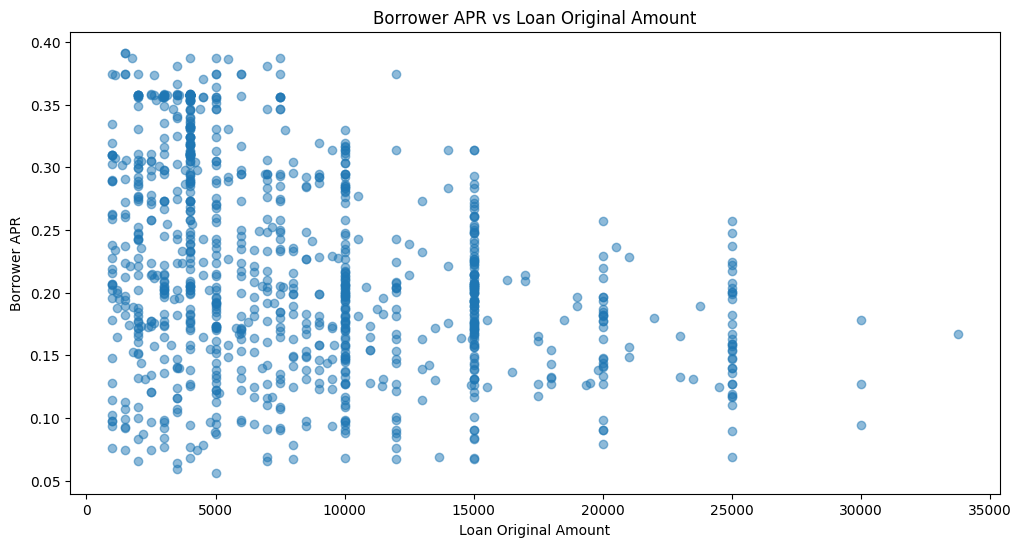

In [34]:
set_figsize()
plt.scatter(data=sample_data, x='LoanOriginalAmount',y='BorrowerAPR', alpha=0.5)
plt.title('Borrower APR vs Loan Original Amount')
plt.xlabel('Loan Original Amount')
plt.ylabel('Borrower APR')
plt.show()

### Observations: 
> There is  no strong linear relationship observed, but the plot indicates that higher loan amounts (above $20,000) 
generally have lower APRs.

### Question 2: How does BorrowerAPR vary with LoanStatus?

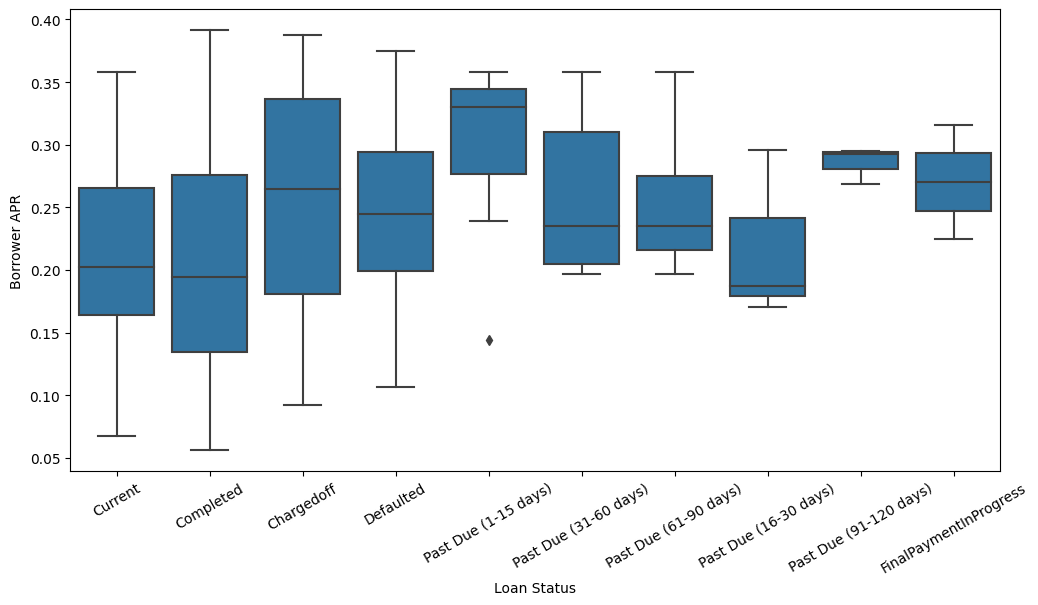

In [35]:
#making 'LoanStatus' variable categorical data type
set_ordered_loan_status(sample_data, 'LoanStatus')

set_figsize()
sns.boxplot(data=sample_data, x='LoanStatus', y='BorrowerAPR',color='tab:blue')
plt.xlabel('Loan Status')
plt.ylabel('Borrower APR')
plt.xticks(rotation=30)
plt.show()

### Observations:
> We observe that median values are high for all categories, with highest median for 'Past Due (1-15 days)' value which also got an outlier. Also, the highest IQR is in 'Chargedoff' value. "Chargedoff" and "Defaulted" loans exhibit higher median APR values, with a wider range and more variability.

### Question 3 : What is the relationship between Term and LoanStatus?

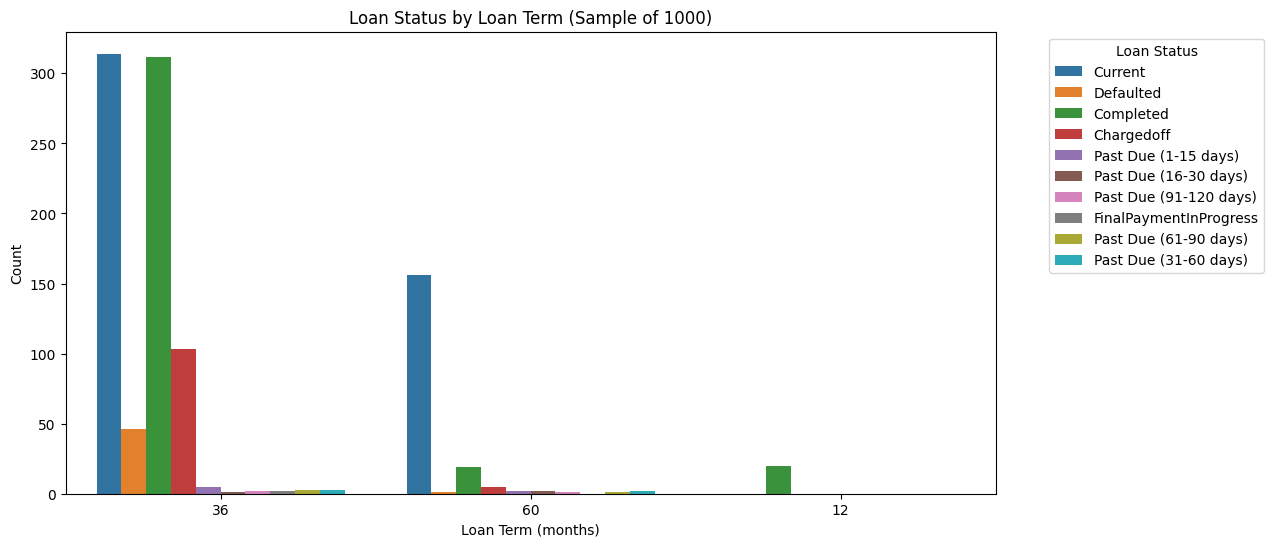

In [44]:
term = [36, 60, 12]
ordered_term = pd.CategoricalDtype(ordered=True,categories=term)
df['Term'] = df['Term'].astype(ordered_term)


set_figsize()
sns.countplot(data=sample_data, x='Term', hue='LoanStatus', order=sample_data['Term'].value_counts().index)
plt.title('Loan Status by Loan Term (Sample of 1000)')
plt.xlabel('Loan Term (months)')
plt.ylabel('Count')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Observations: 
> The 36-month term loans continue to be the most common across all loan statuses, followed by the 60-month term loans.
> "Current" and "Completed" statuses dominate both 36-month and 60-month terms.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> In the scatterplot, we observe an insight which suggests that larger loans are offered to borrowers with better credit profiles, resulting in lower APRs. In the boxplot, we can see that higher APRs might be associated with a higher risk of default or late payments. Borrowers with higher APRs may have poorer credit profiles or higher debt-to-income ratios, leading to greater risk for lenders. In the clustered bar chart, most loans are medium to long-term (36 and 60 months), which are associated with better loan performance compared to shorter-term loans.

> We can also observe the operations we did are logical and the insights we extracted are precious.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Longer loan terms are associated with higher loan amounts, suggesting that borrowers prefer more time to repay larger loans.
> Higher credit grades correspond to higher ProsperScores, confirming their role as reliable indicators of borrower creditworthiness.
> Employed borrowers typically have lower debt-to-income ratios, highlighting the impact of stable employment on financial health.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Question 1: How do BorrowerAPR and LoanOriginalAmount vary by LoanStatus?

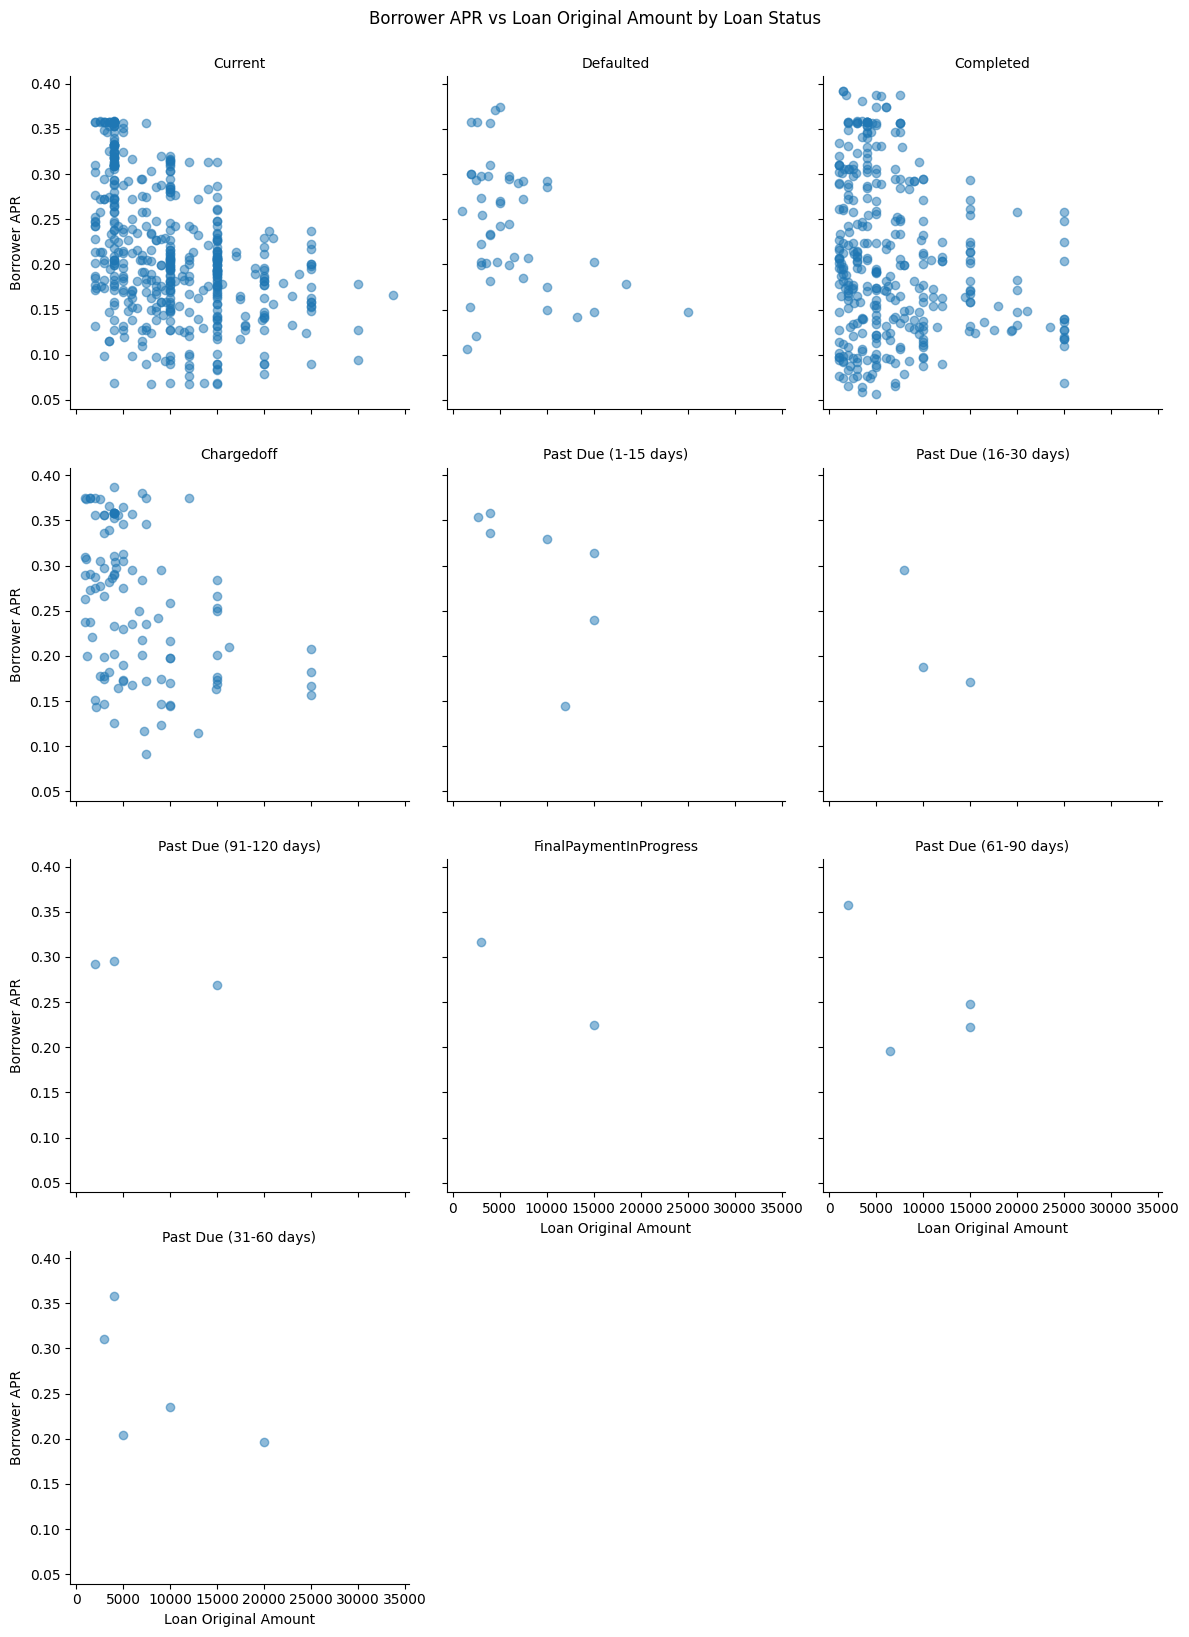

In [54]:
g = sns.FacetGrid(data=sample_data, col="LoanStatus", col_wrap=3, height=4, sharex=True, sharey=True)
g.map(plt.scatter, "LoanOriginalAmount", "BorrowerAPR", alpha=0.5)
g.set_axis_labels("Loan Original Amount", "Borrower APR")
g.set_titles("{col_name}")
g.fig.suptitle('Borrower APR vs Loan Original Amount by Loan Status', y=1.02)
plt.show()

### Observations: 

> The relationship between BorrowerAPR and LoanOriginalAmount appears to differ across loan statuses.
> For "Current" and "Completed" loans, there is a wider range of loan amounts and APR values.
> Higher APR values are more common in "Chargedoff" and "Defaulted" loans, regardless of the loan amount.

### Question 2: What relationship do we find using scatter plot between Borrower APR and Debt to Income Ratio, using the Credit Score Range Lower as the color encoding?

In [46]:
selected_data = sample_data[['BorrowerAPR', 'DebtToIncomeRatio', 'CreditScoreRangeLower']].dropna()

Text(0.5, 1.0, 'Scatter Plot of Borrower APR vs Debt to Income Ratio with Credit Score Encoding')

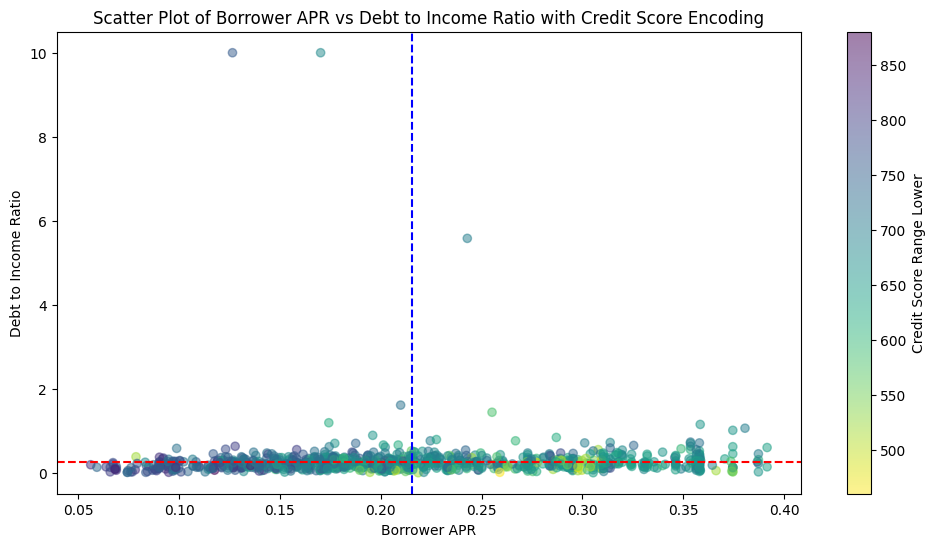

In [52]:
set_figsize()

mean_borrower_apr = selected_data['BorrowerAPR'].mean()
mean_debt_to_income_ratio = selected_data['DebtToIncomeRatio'].mean()

plt.scatter(x=selected_data['BorrowerAPR'],y=selected_data['DebtToIncomeRatio'],c=selected_data['CreditScoreRangeLower'],cmap='viridis_r',alpha=0.5)
plt.colorbar(label = 'Credit Score Range Lower')

plt.axhline(y=mean_debt_to_income_ratio, color='r', linestyle='--', label=f'Average Debt to Income Ratio: {mean_debt_to_income_ratio:.2f}')
plt.axvline(x=mean_borrower_apr, color='b', linestyle='--', label=f'Average Borrower APR: {mean_borrower_apr:.2f}')

plt.xlabel('Borrower APR')
plt.ylabel('Debt to Income Ratio')
plt.title('Scatter Plot of Borrower APR vs Debt to Income Ratio with Credit Score Encoding')


### Observations: 
> The majority of the data points are clustered at lower Debt to Income Ratios, primarily between 0 and 1. This indicates that most borrowers have relatively low debt compared to their income.

> Most Borrower APR values range between 0.05 and 0.30, with a notable average around 0.22. There are fewer loans with very high APRs.

> There are a few outliers with significantly higher Debt to Income Ratios, above 6, and up to 10. These outliers could represent individuals with unusually high debt relative to their income.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Overall, while some features show clear and direct relationships, others might require more complex modeling to fully understand their interactions and contributions to predicting the feature(s) of interest. The observed relationships and distributions suggest that combining multiple features will yield the best results in predictive analysis or modeling.

### Were there any interesting or surprising interactions between features?

>> Based on the scatter plot and the observations, here are a few interesting or surprising interactions between features:

> The distribution of Credit Score Range Lower across Borrower APR and Debt to Income Ratio shows a concentration of mid-range scores. It is interesting that borrowers with very low or very high credit scores are not as common, indicating that the majority of borrowers fall into a middle range of creditworthiness.

> A significant concentration of borrowers with Debt to Income Ratios near zero suggests that a considerable number of borrowers have very low debt relative to their income.


## Conclusions

> The most common loan status is "Current," followed by "Completed." This indicates a high number of ongoing and successfully completed loans

> The distribution of Borrower APR is right-skewed, with a peak around 0.1 to 0.2. This suggests that most borrowers receive an APR within this range

> The majority of the data points are clustered at lower Debt to Income Ratios, primarily between 0 and 1. This indicates that most borrowers have relatively low debt compared to their income.

> Most Borrower APR values range between 0.05 and 0.30, with a notable average around 0.22. There are fewer loans with very high APRs.

> Higher APRs are associated with a higher risk of default or late payments, suggesting that borrowers with higher APRs may have poorer credit profiles or higher debt-to-income ratios 

> The 36-month term loans are the most common across all loan statuses, followed by the 60-month term loans, indicating a preference for medium to long-term loans 

> Longer loan terms are associated with higher loan amounts, suggesting that borrowers prefer more time to repay larger loans. Higher credit grades correspond to higher ProsperScores, confirming their role as reliable indicators of borrower creditworthiness. Employed borrowers typically have lower debt-to-income ratios, highlighting the impact of stable employment on financial health.
